In [19]:
import json
import osmnx as ox
from typing import Tuple, Dict, List
from pathlib import Path
import geopandas as gpd

In [29]:
# Settings:
HELSINKI_CENTER: Tuple[float, ...] = 60.171256, 24.941531
DISTANCE:int = 800
CHAR_JSON_FP: Path = Path("data/alphabet.json")
HOBBY_STR:str = "CYCLE"

In [ ]:
G = G = ox.graph_from_point(HELSINKI_CENTER, dist=DISTANCE, network_type="all")

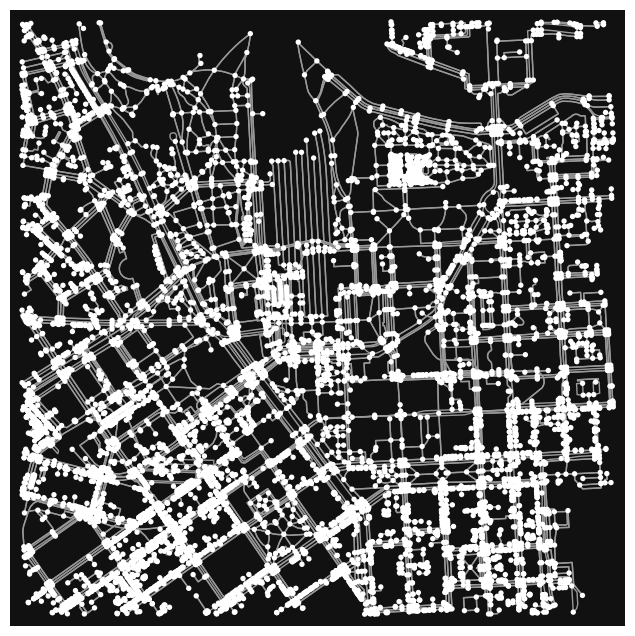

In [38]:
ox.plot_graph(G)
G_nodes_gdf: gpd.GeoDataFrame = ox.graph_to_gdfs(G, edges=False)

network_bounds: List[float] = list(G_nodes_gdf.total_bounds)
G_width: float = network_bounds[2] - network_bounds[0]  # xmax - xmin
G_height: float = network_bounds[1] - network_bounds[3]  # ymax - ymin

# each character with the spacing is 3 units. 
# +2 is added to avoid colliding with the boundaries of the network
test_scale: float = float(G_width) / (len(HOBBY_STR)*3 + 2)
starting_pt: List[float] = [
    network_bounds[0] + test_scale,
    (G_height / 3) + network_bounds[1],  
]

In [ ]:
with open(file=CHAR_JSON_FP, mode="r") as f:
    char_vector: Dict = json.loads(f.read())

In [39]:
starting_pt


[np.float64(24.928766905882352), np.float64(60.159265833333336)]

In [36]:
char_vector["C"]


{'0': {'vec': [-1, 0], 'type': 'body'},
 '1': {'vec': [0, -2], 'type': 'body'},
 '2': {'vec': [1, 0], 'type': 'body'},
 '3': {'vec': [1, 2], 'type': 'move'}}